In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.tree import plot_tree

In [6]:
df = pd.read_csv("datasetnew.csv")
df.head(60)

,Dist,Fuel,Body_characteristics,Sensors,Match_of_the_route,Efficient
0,500,700,1,5,1,yes
1,1000,1500,2,8,1,yes
2,2200,3500,3,10,0,no
3,1200,1600,2,8,1,yes
4,2100,3400,3,10,0,no
5,1800,2600,2,8,1,yes
6,1900,2700,2,8,1,yes
7,1000,1500,2,8,1,yes
8,500,700,1,5,1,yes
9,700,1000,1,5,1,yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Dist                  60 non-null     int64 
 1   Fuel                  60 non-null     int64 
 2   Body_characteristics  60 non-null     int64 
 3    Sensors              60 non-null     int64 
 4   Match_of_the_route    60 non-null     int64 
 5   Efficient             60 non-null     object
dtypes: int64(5), object(1)
memory usage: 2.9+ KB


In [8]:
df.shape

(60, 6)

In [9]:
df.isnull().any()

Dist                    False
Fuel                    False
Body_characteristics    False
 Sensors                False
Match_of_the_route      False
Efficient               False
dtype: bool

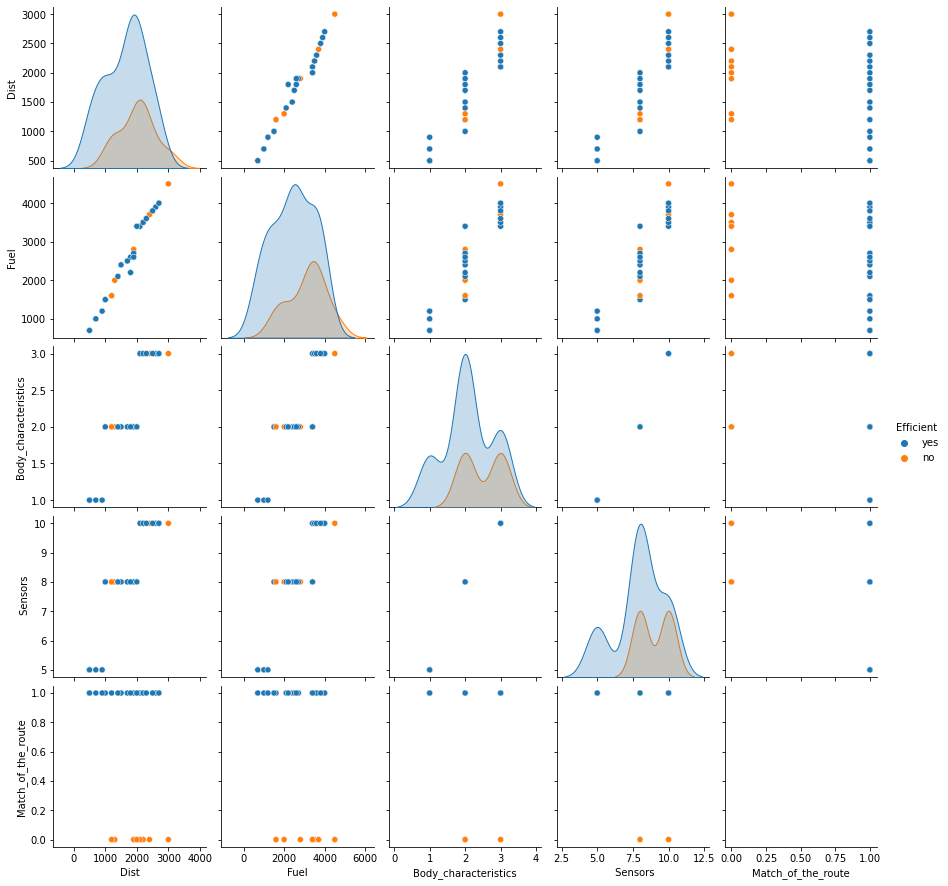

In [10]:
sns.pairplot(data=df, hue = 'Efficient')

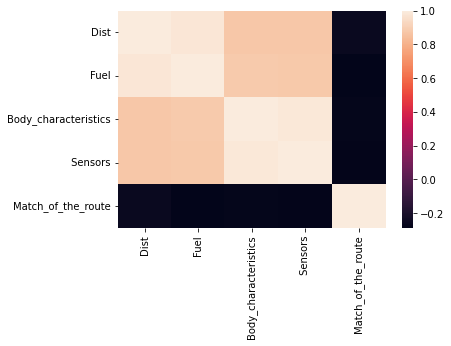

In [11]:
sns.heatmap(df.corr())

In [12]:
target = df['Efficient']
df1 = df.copy()
df1 = df1.drop('Efficient', axis =1)

In [13]:
X = df1

In [14]:
target

0     yes
1     yes
2      no
3     yes
4      no
5     yes
6     yes
7     yes
8     yes
9     yes
10    yes
11    yes
12     no
13     no
14     no
15     no
16     no
17    yes
18    yes
19    yes
20    yes
21     no
22    yes
23    yes
24    yes
25    yes
26    yes
27    yes
28    yes
29    yes
30    yes
31    yes
32     no
33    yes
34     no
35    yes
36    yes
37    yes
38    yes
39    yes
40    yes
41    yes
42     no
43     no
44     no
45     no
46     no
47    yes
48    yes
49    yes
50    yes
51     no
52    yes
53    yes
54    yes
55    yes
56    yes
57    yes
58    yes
59    yes
Name: Efficient, dtype: object

In [15]:
le = LabelEncoder()
target = le.fit_transform(target)
target

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
y = target

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 1)

In [18]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
y_pred = model.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        10

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



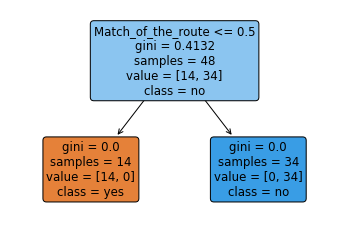

In [20]:
dec_tree = plot_tree(decision_tree=model, feature_names = df1.columns, 
                     class_names =["yes", "no"] , filled = True , precision = 4, rounded = True)